In [120]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# data = pd.read_csv('data-sets/monthly-car-sales.csv', parse_dates=[0], squeeze=True, index_col=0)
data = pd.read_csv('data-sets/air_passengers.csv', parse_dates=[0], squeeze=True, index_col=0)


from statsmodels.tsa.stattools import adfuller
result = adfuller(data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:


/var/folders/39/438kbb8j341fw7b_dxqc85300000gn/T/ipykernel_36148/621062134.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv('data-sets/air_passengers.csv', parse_dates=[0], squeeze=True, index_col=0)


In [121]:
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

	1%: -3.482
	5%: -2.884
	10%: -2.579


Text(0.5, 1.0, '2nd Order Differencing')

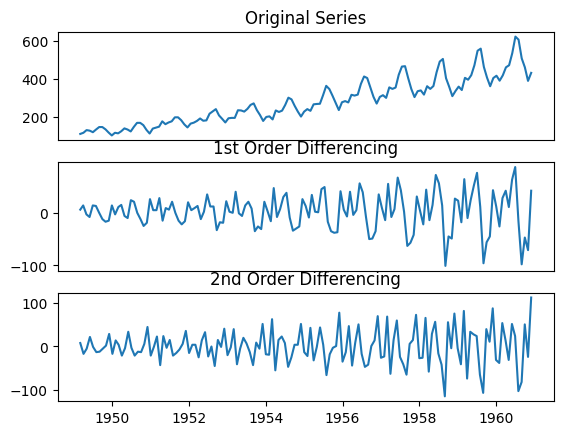

In [122]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data.values); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data.diff().diff()); ax3.set_title('2nd Order Differencing')

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


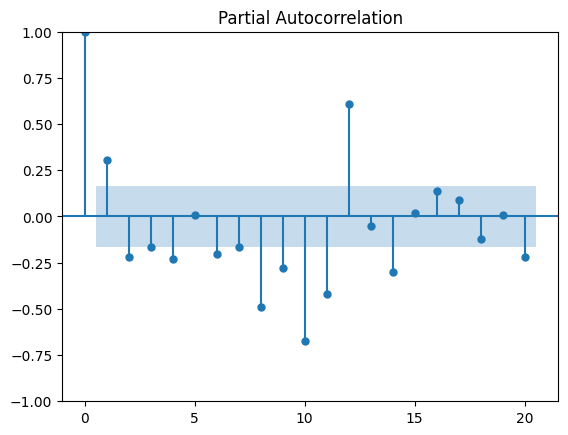

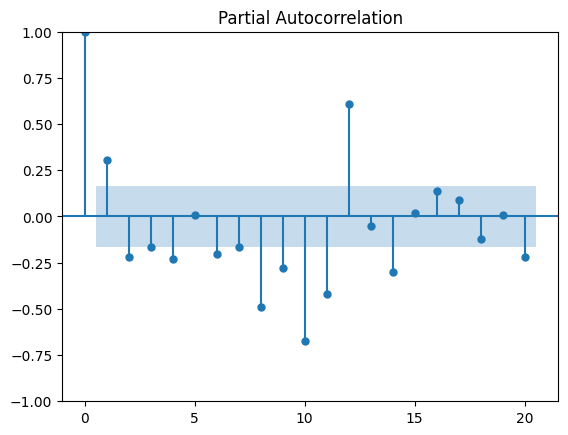

In [123]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.diff().dropna(),lags=20)

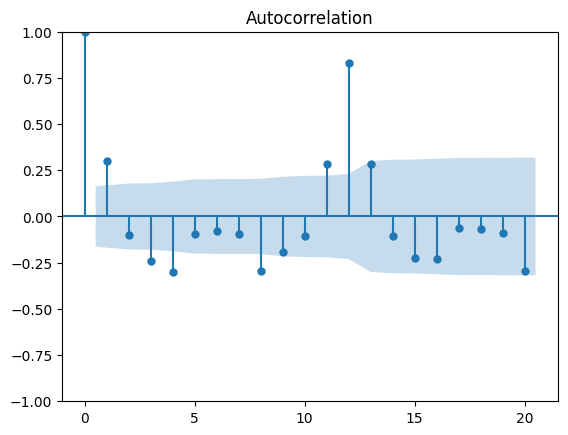

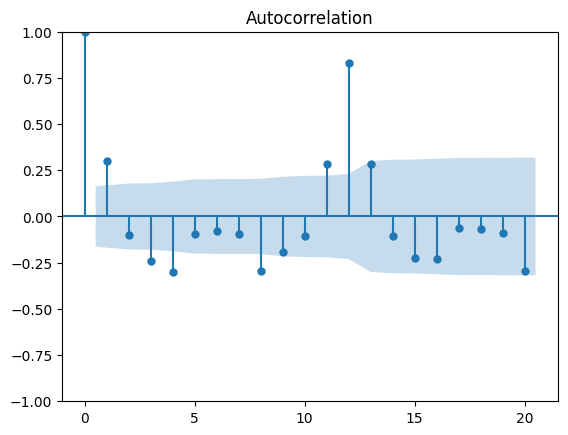

In [124]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.diff().dropna(), lags=20)

In [125]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['1965-1':], order = (8,1,1))
model_fit = model.fit()

# p = 8 sectik cünkü pacf grafiğinde 8 den sonra oldukça fazla değişim görülüyor.

# q = 1 sectik cunku acf grafiginde 1'den sonra oldukca fazla degisim goruluyor.

# d = 1 sectik cünkü veride tren

predicted_data = model_fit.predict(start="1965-1", end="1968-12")
new_data = data['1965-1':]

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too

LinAlgError: Schur decomposition solver error.

In [ ]:
error = abs(np.divide((np.subtract(new_data.values, predicted_data.values)), new_data.values) * 100)
error_index = new_data.index

ValueError: operands could not be broadcast together with shapes (0,) (48,) 

In [ ]:
error_df = pd.DataFrame(error, error_index)
plt.plot(error_df)

fig, ax = plt.subplots()

ax = data.loc['1965-1':].plot(ax=ax)
predicted_data.plot(ax=ax)

plt.show()